# 直方图均衡

提高对比度

https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

## 直方图均衡化

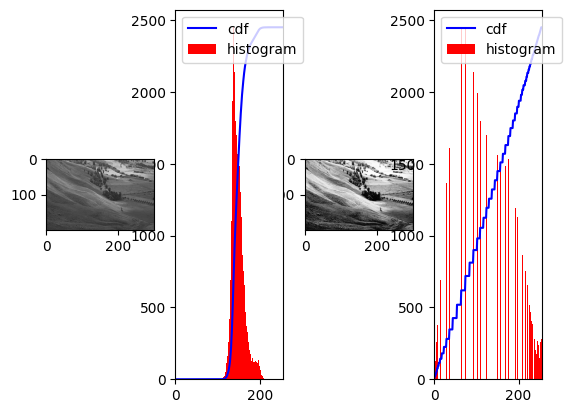

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('caoyuan.jpg', cv.IMREAD_GRAYSCALE)

assert img is not None, "file could not be read, check with os.path.exists()"

# 直方图均衡化

hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum() # 累积分布函数
cdf_normalized = cdf * float(hist.max()) / cdf.max() # 归一化

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]

hist2,bins2 = np.histogram(img2.flatten(),256,[0,256])
cdf2 = hist2.cumsum() # 累积分布函数
cdf_normalized2 = cdf2 * float(hist.max()) / cdf2.max() # 归一化

plt.subplot(143)
plt.imshow(img2, cmap='gray')
plt.subplot(142)
plt.plot(cdf_normalized, color = 'b')  # 绘制累积分布函数
plt.hist(img.flatten(),256,[0,256], color = 'r') # 绘制直方图
plt.xlim([0,256]) # 设置x轴范围
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.subplot(141)
plt.imshow(img, cmap='gray')
plt.subplot(144)
# 绘制img2累积分布函数
plt.plot()
plt.plot(cdf_normalized2, color = 'b')  # 绘制累积分布函数
plt.hist(img2.flatten(),256,[0,256], color = 'r') # 绘制直方图
plt.xlim([0,256]) # 设置x轴范围
plt.legend(('cdf','histogram'), loc = 'upper left') # cdf累积分布函数

plt.show()

## OpenCV 中的均衡化

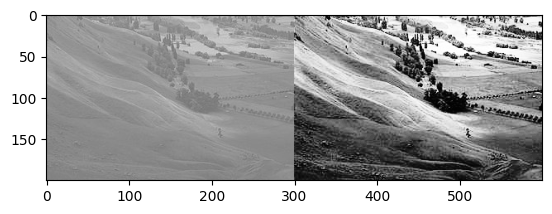

In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('caoyuan.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side

plt.imshow(res, cmap='gray') # camp: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

## CLAHE（对比度有限自适应直方图均衡）

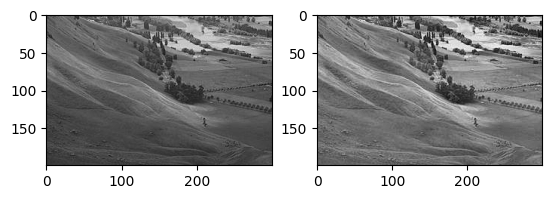

In [17]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('caoyuan.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) # 自适应直方图均衡化 2.0是对比度的限制，8*8是每个小块的大小
cl1 = clahe.apply(img)

plt.subplot(121)
plt.imshow(img,'gray')
plt.subplot(122)
plt.imshow(cl1,'gray')
plt.show()